# Playground
This file is not part of the model. It is mainly used to look at the data, niche distributions, plotting, testing functions, debugging etc.

In [1]:
import sys
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
file_path = Path("/Users/mathias/Code/masterpraktikum_ssl/Build_PytorchModel/data/adata_test_uncompressed.h5ad")
adata = sc.read(file_path)
print(adata)

print(adata.obs['sample'].unique())

print(sys.getsizeof(adata))

print(adata.obs['Niche_NMF'].unique)


AnnData object with n_obs × n_vars = 12514 × 1500
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fac

In [29]:
# 4 healthy, 3 IPF, 4 randoms
sample_names = ['90_A1_H237762_IPF_processed_CM', '90_C1_RO-730_Healthy_processed_CM', '91_A1_RO-727_Healthy_processed_CM', '91_B1_RO-728_Healthy_processed_CM', '91_D1_24513-17_IPF_processed_CM', '92_D1_RO-3736_IPF_processed_CM', '92_A1_RO-3203_Healthy_processed_CM', '1217_0001_processed_aligned', '1217_0002_processed_aligned', '1217_0003_processed_aligned', '1217_0004_processed_aligned']
sample_counts = [len(adata.obs[adata.obs['sample'] == s]) for s in sample_names]
total_counts = np.sum(sample_counts)
sample_counts_norm = sample_counts/total_counts

print(sample_counts)
print(sample_counts_norm)
print(total_counts)

[2793, 2877, 2377, 2448, 3284, 1931, 2412, 10728, 8624, 12107, 8206]
[0.04833267 0.04978628 0.04113382 0.04236247 0.05682939 0.03341582
 0.04173949 0.18564729 0.14923772 0.20951079 0.14200426]
57787


In [13]:
from collections import Counter

def get_class_distribution(data_loader):
  class_counts = Counter()
  for data, labels in data_loader:
    class_counts.update(labels.tolist())
  return class_counts

train_class_counts = get_class_distribution(train_loader)

# Get class distribution for validation set
val_class_counts = get_class_distribution(val_loader)

print("Class Distribution:")
print("| Class Label | Training Set Count | Validation Set Count |")
print("|---|---|---|")
for class_label, count in train_class_counts.items():
  val_count = val_class_counts.get(class_label, 0)  # Handle potential missing class in validation set
  print(f"| {class_label} | {count} | {val_count} |")

print("Note: Missing classes in one set will have a count of 0 in that set.")


Class Distribution:
| Class Label | Training Set Count | Validation Set Count |
|---|---|---|
| 1 | 10023 | 2506 |
| 7 | 1406 | 352 |
| 3 | 693 | 173 |
| 2 | 1020 | 255 |
| 0 | 342 | 86 |
| 4 | 765 | 192 |
| 5 | 194 | 48 |
| 6 | 54 | 13 |
Note: Missing classes in one set will have a count of 0 in that set.


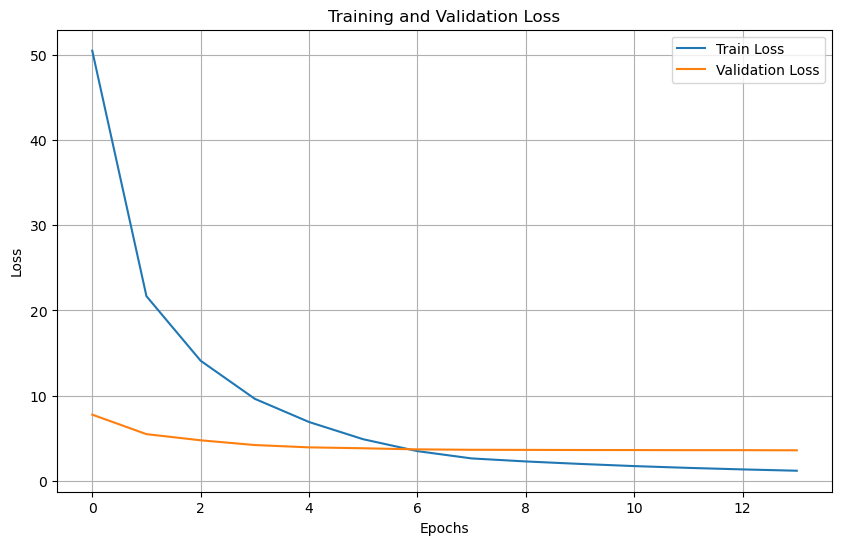

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = """0,50.44941,7.79006,0.82023
1,21.67532,5.50372,0.87269
2,14.10827,4.78247,0.90065
3,9.64232,4.22623,0.90154
4,6.92731,3.95473,0.90470
5,4.90640,3.84801,0.90401
6,3.51182,3.71934,0.90843
7,2.65806,3.67102,0.91349
8,2.30268,3.65836,0.91451
9,2.01383,3.64273,0.91085
10,1.75881,3.63819,0.91189
11,1.54850,3.62466,0.91083
12,1.37017,3.62713,0.91191
13,1.21600,3.60949,0.91211"""

# Parse the data
lines = data.strip().split('\n')
epochs = []
train_losses = []
val_losses = []

for line in lines:
    epoch, train_loss, val_loss, _ = line.split(',')
    epochs.append(int(epoch))
    train_losses.append(float(train_loss))
    val_losses.append(float(val_loss))

# Convert lists to numpy arrays
epochs = np.array(epochs)
train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


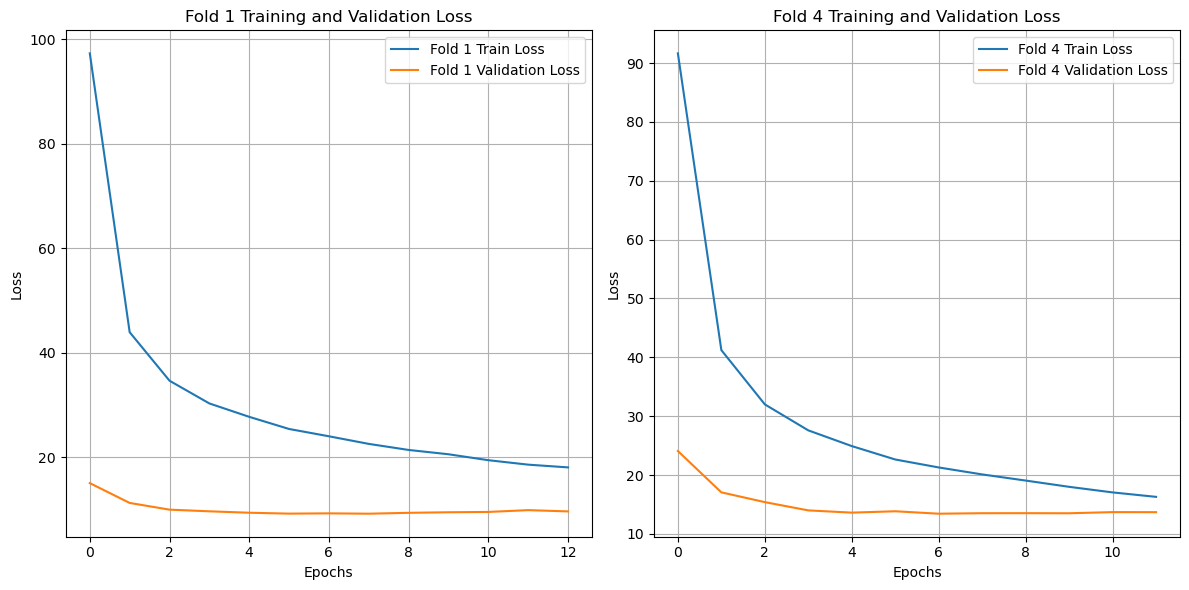

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for folds 1 and 4
data = """1,0,97.25654,15.07089,0.85126
1,1,43.93349,11.28484,0.88490
1,2,34.65677,10.00098,0.89405
1,3,30.31076,9.68408,0.89666
1,4,27.74970,9.41120,0.89830
1,5,25.42852,9.24085,0.89879
1,6,24.03143,9.29299,0.90003
1,7,22.57600,9.22611,0.89886
1,8,21.41677,9.39414,0.89802
1,9,20.59407,9.50136,0.89780
1,10,19.45798,9.56362,0.89952
1,11,18.60580,9.90878,0.89393
1,12,18.08162,9.66390,0.89916
4,0,91.63993,24.08783,0.74606
4,1,41.23106,17.06664,0.82374
4,2,32.01311,15.40773,0.82202
4,3,27.59648,14.00357,0.84359
4,4,24.92850,13.62317,0.85103
4,5,22.64934,13.85497,0.83494
4,6,21.29693,13.44071,0.84605
4,7,20.11240,13.52497,0.84452
4,8,19.07018,13.53051,0.84366
4,9,18.00555,13.51519,0.84363
4,10,17.05776,13.71070,0.84388
4,11,16.30181,13.70148,0.84281"""

# Parse the data for folds 1 and 4
lines = data.strip().split('\n')
fold_1_epochs = []
fold_1_train_losses = []
fold_1_val_losses = []
fold_4_epochs = []
fold_4_train_losses = []
fold_4_val_losses = []

for line in lines:
    kfold, epoch, train_loss, val_loss, _ = map(float, line.split(','))
    if kfold == 1:
        fold_1_epochs.append(epoch)
        fold_1_train_losses.append(train_loss)
        fold_1_val_losses.append(val_loss)
    elif kfold == 4:
        fold_4_epochs.append(epoch)
        fold_4_train_losses.append(train_loss)
        fold_4_val_losses.append(val_loss)

# Convert lists to numpy arrays
fold_1_epochs = np.array(fold_1_epochs)
fold_1_train_losses = np.array(fold_1_train_losses)
fold_1_val_losses = np.array(fold_1_val_losses)
fold_4_epochs = np.array(fold_4_epochs)
fold_4_train_losses = np.array(fold_4_train_losses)
fold_4_val_losses = np.array(fold_4_val_losses)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fold_1_epochs, fold_1_train_losses, label='Fold 1 Train Loss')
plt.plot(fold_1_epochs, fold_1_val_losses, label='Fold 1 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fold 1 Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(fold_4_epochs, fold_4_train_losses, label='Fold 4 Train Loss')
plt.plot(fold_4_epochs, fold_4_val_losses, label='Fold 4 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fold 4 Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
